In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import os
#from ReadKTOutputFile import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#filepath = '../data_from_Christine/uniform_power_and_slope.json'
filepath = '../20200626_sierra/mega_dict.json'
with open(filepath) as infile:
    a = json.load(infile)

In [4]:
#a list of the true, simulated slopes and a list of the reconstructed slopes, and those of frequencies and track start times
true_slope_load = []
recon_slope_load = []
true_freq_load = []
recon_freq_load = []
true_track_times_load = []
recon_track_times_load = []
    
for event in a.keys():
    true_slope_load.append(a[event]['slopes_true'])
    recon_slope_load.append(a[event]['track_slopes_recon'])
    true_freq_load.append(a[event]['start_frequencies_true'][0])
    recon_freq_load.append(a[event]['event_start_frequencies_recon'])
    true_track_times_load.append(a[event]['start_times_true'])
    recon_track_times_load.append(a[event]['track_start_times_recon'])

In [19]:
len(true_slope_load)

100000

In [20]:
len(true_slope)

10768

In [5]:
#removing events that weren't reconstructed
true_slope = []
recon_slope = []
true_freq = []
recon_freq = []
true_track_times = []
recon_track_times = []
for i in range(len(recon_slope_load)):
    if len(recon_freq_load[i]) > 1:
        recon_freq_load[i] = [recon_freq_load[i][0]]
    if (len(recon_slope_load[i]) > 0) and (len(recon_freq_load[i]) > 0):
        true_slope.append(true_slope_load[i])
        recon_slope.append(recon_slope_load[i])
        true_freq.append(true_freq_load[i])
        recon_freq.append(recon_freq_load[i])
        true_track_times.append(true_track_times_load[i])
        recon_track_times.append(recon_track_times_load[i])

In [6]:
#calculating the frequency error
recon_freq = np.hstack(recon_freq)
#print(len(rec_freq_list))
rec_freq = (recon_freq+24.5e9+1.4e9-50e6)
true_freq = np.asarray(true_freq)
freq_error = rec_freq/1e3 - true_freq/1e3

In [7]:
#convert reconstucted slope to MHz/ms units
for i, event in zip(range(len(recon_slope)), recon_slope):
    for j in range(len(event)):
        recon_slope[i][j] = recon_slope[i][j]/1e9
#print(recon_slope)

In [8]:
#find the min and max slope
slope_max_r = None
slope_min_r = None
slope_max_s = None
slope_min_s = None
for sim, recon in zip(true_slope, recon_slope):
    if slope_max_r == None:
        slope_max_r = np.max(recon)
    elif slope_max_r < np.max(recon):
        slope_max_r = np.max(recon)
    
    if slope_min_r == None:
        slope_min_r = np.min(recon)
    elif slope_min_r > np.min(recon):
        slope_min_r = np.min(recon)
        
    if slope_max_s == None:
        slope_max_s = np.max(sim)
    elif slope_max_s < np.max(sim):
        slope_max_s = np.max(sim)
    
    if slope_min_s == None:
        slope_min_s = np.min(sim)
    elif slope_min_s > np.min(sim):
        slope_min_s = np.min(sim)

slope_max = np.max([slope_max_r, slope_max_s])
slope_min = np.min([slope_min_r, slope_min_s])
print(slope_max, slope_min)

2.086162567147739 7.631710085065913e-13


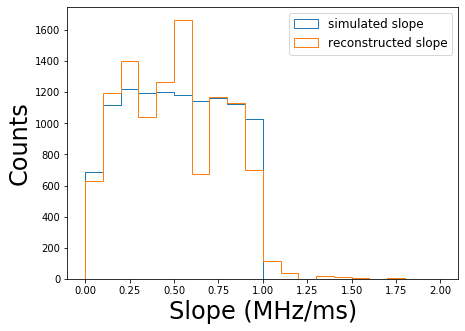

In [9]:
######################## simulation vs reconstruction plots
plt.figure(figsize=(7,5))
##total counts per slope
plt.tight_layout()
#bins = np.linspace(slope_min, slope_max, 10)
bins = np.arange(slope_min, slope_max, 0.1)
#flattening the list of lists of the slopes to make a histogram
true_slope_flat = [slope for event in true_slope for slope in event]
recon_slope_flat = [slope for event in recon_slope for slope in event]
n0, b0, p0 = plt.hist(true_slope_flat, histtype='step', label='simulated slope', bins=bins)
n1, b1, p1 = plt.hist(recon_slope_flat, bins=bins, histtype='step', label='reconstructed slope')
#plt.xlim(0, 1.0, 0.1)
plt.xlabel('Slope (MHz/ms)', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.legend(fontsize=12, loc=0)
#plt.savefig('../data_from_Christine/sim_v_recon_slope_hist.png')
plt.show()

In [10]:
recon_slope

[[0.276873188637472],
 [0.5960464477534152],
 [0.7139457451116876],
 [0.8940696716125407, 0.6599085671467794],
 [0.10927518208822028],
 [0.5635348233314287],
 [0.2213886805837429],
 [0.21287373134062337],
 [0.6483312238773775],
 [0.016432358208764514],
 [0.5108969552078517],
 [0.417232513454607],
 [0.11346042897499918],
 [0.7024833134235938],
 [0.4825137910391175],
 [0.6599085671554973],
 [0.15894571940097163],
 [0.23252361423367385],
 [0.7410307188285186],
 [0.7024833134235938],
 [0.3917118902735107],
 [0.5310231989084617, 0.6386211940218701],
 [0.1702989850670589],
 [0.22178472473948205],
 [0.20890843634513948],
 [0.11920928954004305],
 [0.945082655899442],
 [0.773249445743208],
 [0.25828679403443183],
 [0.02709302035609639],
 [0.4421798208953826],
 [0.9253308489617041],
 [0.953674316405654],
 [0.4411509980663087],
 [0.3995476188213979],
 [0.2213886805940439],
 [0.20577794029609422],
 [0.15386662686915187],
 [0.5960464477725382],
 [0.9781725873207144],
 [0.5960464477325931],
 [0.0605

In [11]:
print(len(recon_slope_flat))

11067


In [12]:
recon_slope_arr = np.array([np.array(i) for i in recon_slope])
true_slope_arr = np.array([np.array(i) for i in true_slope])

In [13]:
#calculating the slope error for events that only have the same number of reconstructed tracks as simulated tracks
freq_error_equal_track = []
slope_error_equal_track = []
for sim_event, recon_event, delta_freq in zip(true_slope, recon_slope, freq_error):
    if len(sim_event) == len(recon_event):
        freq_error_equal_track.append(delta_freq)
        for sim_track, recon_track in zip(sim_event, recon_event):
            slope_error_equal_track.append(recon_track-sim_track)

In [14]:
slope_error_first_track = []
#freq_error_first_track = []
for i in range(len(recon_slope)):
    if recon_track_times[i][0] < true_track_times[i][0]:
        slope_error_first_track.append(recon_slope[i][0]-true_slope[i][0])
    else:
        for j in range(len(true_slope[i])):
            try:
                if (recon_track_times[i][0] >= true_track_times[i][j]) & (recon_track_times[i][0] < true_track_times[i][j+1]):
                    slope_error_first_track.append(recon_slope[i][0]-true_slope[i][j])
            #when there is no j+1 because it is iterating through the last item in true slope list
            except IndexError:
                if recon_track_times[i][0] >= true_track_times[i][j]:
                    slope_error_first_track.append(recon_slope[i][0]-true_slope[i][j])
                break

In [15]:
# #most reconstructed events don't reconstruct every single track
# #labeling which track the reconstructed slope corresponds to
# slope_error = []
# slope_error_first_track = []
# freq_error_first_track = []
# for sim_event_slope, recon_event_slope, sim_event_time, recon_event_time in zip(true_slope, recon_slope, true_track_times, recon_track_times):
#     #selecting the reconstructed events with the same number of tracks as the simulated events
#     if len(sim_event_slope) == len(recon_event_slope):
#         #getting the slope error just by subtracting each element from each other (recon-true)
#         for sim_track_slope, recon_track_slope in zip(sim_event_slope, recon_event_slope):
#             slope_error.append(recon_track_slope-sim_track_slope)
#     #selecting the reconstructed events with a different number of tracks than the simulated events
#     else:
#         #finding the simulated track that corresponds to each reconstructed track
#         for sim_track_slope, recon_track_slope, recon_track_time in zip(sim_event_slope, recon_event_slope, recon_event_time):
#             if recon_track_time < sim_event_time[0]:
#                 slope_error.append(recon_track_slope-sim_track_slope)
#                 #slope_error_first_track.append(recon_track_slope-sim_track_slope)
#                 #freq_error_first_track.append()
# #             elif recon_track_time < sim_event_time[1]:
# #                 slope_error.append(recon_track_slope-sim_track_slope)
#             else:
#                 for i in range(len(sim_event_time)):
#                     try:
#                         if (recon_track_time >= sim_event_time[i]) & (recon_track_time < sim_event_time[i+1]):
#                             slope_error.append(recon_track_slope-sim_track_slope)
#                     except IndexError:
#                         if recon_track_time >= sim_event_time[i]:
#                             slope_error.append(recon_track_slope-sim_track_slope)
#                         break

In [16]:
# #most reconstructed events don't reconstruct every single track
# #labeling which track the reconstructed slope corresponds to
# slope_error = []
# slope_error_first_track = []
# freq_error_first_track = []
# for sim_event_slope, recon_event_slope, sim_event_time, recon_event_time in zip(true_slope, recon_slope, true_track_times, recon_track_times):
#     #selecting the reconstructed events with the same number of tracks as the simulated events
#     if len(sim_event_slope) == len(recon_event_slope):
#         #getting the slope error just by subtracting each element from each other (recon-true)
#         for sim_track_slope, recon_track_slope in zip(sim_event_slope, recon_event_slope):
#             slope_error.append(recon_track_slope-sim_track_slope)
#     #selecting the reconstructed events with a different number of tracks than the simulated events
#     else:
#         #finding the simulated track that corresponds to each reconstructed track
#         for sim_track_slope in sim_event_slope:
#             #selecting the reconstructed events with the same number of tracks as the simulated events
#     if len(sim_event_slope) == len(recon_event_slope):
#         #getting the slope error just by subtracting the first tracks from one another (recon-true)

In [15]:
len(slope_error_first_track)

10768

In [16]:
recon_time_flat = [time for event in recon_track_times for time in event]
len(recon_time_flat)

11067

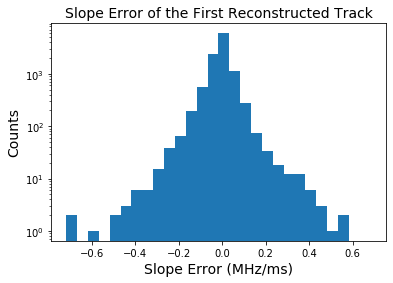

In [17]:
##### plotting a histogram of slope error
plt.figure()
plt.tight_layout()
plt.title('Slope Error of the First Reconstructed Track', fontsize=14)
plt.hist(slope_error_first_track, bins=np.arange(np.min(slope_error_first_track), np.max(slope_error_first_track), 0.05))
plt.xlabel('Slope Error (MHz/ms)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.yscale('log')
#plt.savefig('../data_from_Christine/slope_error_hist_first_track.png')
plt.show()

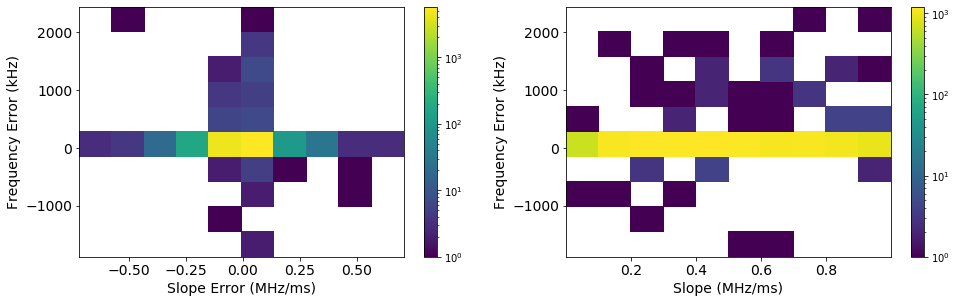

In [23]:
max_freq_error = np.max(freq_error)
min_freq_error = np.min(freq_error)
fig, ax = plt.subplots(1, 2, figsize=(16, 4.6))
#plt.tight_layout()
ax[0].set_xlabel('Slope Error (MHz/ms)', fontsize=14)
ax[0].set_ylabel('Frequency Error (kHz)', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)
hist0 = ax[0].hist2d(slope_error_first_track, freq_error, norm=colors.LogNorm())
plt.colorbar(hist0[3], ax=ax[0])
ax[1].set_xlabel('Slope (MHz/ms)', fontsize=14)
ax[1].set_ylabel('Frequency Error (kHz)', fontsize=14)
ax[1].tick_params(axis='both', labelsize=14)
hist1 = ax[1].hist2d([track[0] for track in true_slope], freq_error, norm=colors.LogNorm())
plt.colorbar(hist1[3], ax=ax[1])
#plt.grid()
#plt.savefig('../data_from_Christine/slope_freq_error_first_track.png')
plt.show()

In [22]:
#loading each parameter into a json file to be used for a plot matrix
with open('../20200626_sierra/frequency.json', 'w') as freq_file:
    json.dump(true_freq.tolist(), freq_file)
    
with open('../20200626_sierra/freq_error.json', 'w') as freq_error_file:
    json.dump(freq_error.tolist(), freq_error_file)
    
with open('../20200626_sierra/slope.json', 'w') as slope_file:
    json.dump([track[0] for track in true_slope], slope_file)
    
with open('../20200626_sierra/slope_error.json', 'w') as slope_error_file:
    json.dump(slope_error_first_track, slope_error_file)